In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "pictures/"
CATEGORIES = ["Bishop", "Knight", "Pawn", "Queen", "Rook"]

In [2]:
def create_data():
    min_size = 48
    training_data = []
    for category in CATEGORIES:
        path = DATADIR + category
        category_index = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(path + '/' + img)
            if img_array.shape[0] < min_size or img_array.shape[1] < min_size:
                continue
            img_resized = cv2.resize(img_array, (min_size, min_size))
            training_data.append([img_resized, category_index])
    return training_data

In [3]:
training_data = create_data()
print(training_data[0][0].shape)

(48, 48, 3)


In [4]:
import random

# to mix the data
random.shuffle(training_data)

In [5]:
X = [] # the X_training
Y = [] # the Y_training

In [6]:
for pixels, category in training_data:
    X.append(pixels)
    Y.append(category)

In [7]:
X = np.array(X)
# X = X.reshape(X.shape[0], X.shape[1], X.shape[2],1)
Y = np.array(Y)
print(X.shape)
print(Y.shape)

(2038, 48, 48, 3)
(2038,)


In [8]:
import tensorflow as tf
X = X / 255.0

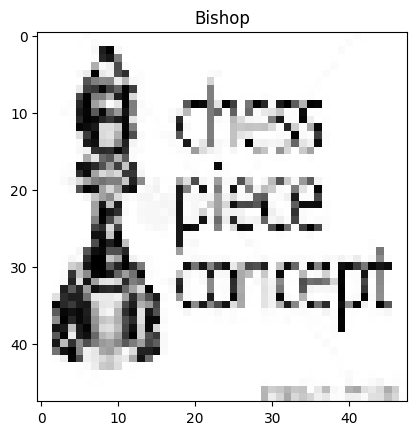

In [9]:
index_test = 67
plt.imshow(X[index_test])
plt.title(CATEGORIES[Y[index_test]])
plt.show()

In [10]:
split_size = int(0.8 * X.shape[0])

X_train = X[:split_size, :]
X_test = X[split_size:, :]

Y_train = Y[:split_size]
Y_test = Y[split_size:]

In [11]:
print(X.shape[1:])

(48, 48, 3)


In [12]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [17]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Input((X.shape[1], X.shape[2], X.shape[3])))

model.add(tf.keras.layers.Conv2D(32 , (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(64 , (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(256, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(len(CATEGORIES), activation='softmax'))

In [18]:
best_model_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = './best_chess_model.keras',
    monitor = 'val_accuracy',
    mode = 'max',
    save_best_only=True
)

save_model_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = "./{epoch:02d}.keras",
    save_freq = 'epoch'
)

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 522,565 (1.99 MB)

 Trainable params: 522,565 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.fit(X_train, Y_train,
        epochs=1024,
        validation_data=(X_test, Y_test),
        callbacks=[best_model_callback, save_model_callback])

Epoch 1/1024
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.2256 - loss: 1.6004 - val_accuracy: 0.2770 - val_loss: 1.5787
Epoch 2/1024
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.2825 - loss: 1.5455 - val_accuracy: 0.2745 - val_loss: 1.5617
Epoch 3/1024
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.2750 - loss: 1.5143 - val_accuracy: 0.2745 - val_loss: 1.5497
Epoch 4/1024
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.2711 - loss: 1.5140 - val_accuracy: 0.2745 - val_loss: 1.5417
Epoch 5/1024
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.2449 - loss: 1.5070 - val_accuracy: 0.2745 - val_loss: 1.5359
Epoch 6/1024
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.2578 - loss: 1.5028 - val_accuracy: 0.2745 - val_loss: 1.5332
Epoch 7/1024
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.2698 - loss: 1.4973 - val_accuracy: 0.2745 - val_loss: 1.5308
Epoch 8/1024
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.2722 - loss: 1.5101 - val_accu

In [21]:
model = tf.keras.models.load_model("best_chess_model.keras")

In [22]:
val_loss, val_acc = model.evaluate(X_test, Y_test)
print(val_acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7320 - loss: 0.8891
0.7598039507865906


In [24]:
predictions = model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


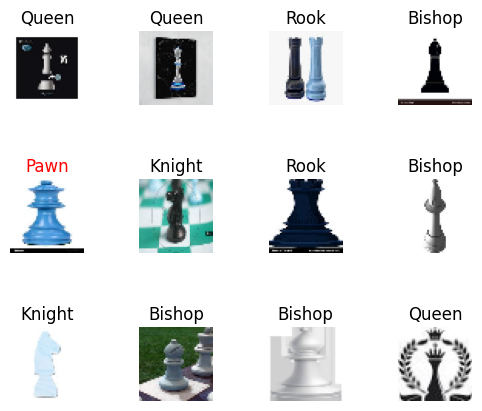

In [27]:
x = 100
y = x+12
# printing some pictures of the x_test and it's predictions as title
false_values = 0
for i in range(x, y):
    plt.subplot(3, 4, i-x+1)
    plt.subplots_adjust(hspace=1)
    plt.imshow(X_test[i])
    plt.axis('off')
    color = 'black'
    if np.argmax(predictions[i]) != Y_test[i]:
        false_values = false_values + 1
        color = 'red'
    plt.title(CATEGORIES[np.argmax(predictions[i])], color=color)
plt.show()